# Question 1:

In this problem we will verify that ensembles indeed perform better than individual classifiers.

Consider K set of binary classifiers. For simplicity we shall simulate the accuracy of each classifier using a
probability value p. To do the ensemble, we repeat the following N times.



*   Generate K random binary values in {0, 1} with probability of 1 being p. (Look at the function
numpy.random.choice)
*   Take a Majority Vote to predict the class.

Now, accuracy is nothing but the percentage of times (out of N) we predict 1.


**REASONING**: Essentially, we are assuming that an individual classifier is correct with probability p. So, if we generate K random binary values, we randomly guess if each of the K classifier is correct/wrong. So, if the majority vote is 1 then we have predicted the correct class, else we have predicted the wrong class. Hence accuracy is nothing but percentage of times (out of N) we predict value 1.

Report the accuracy when we substitute the following values:

> • p=0.49,K=1000,N=1000

> • p=0.51,K=1000,N=1000 • p=0.51,K=10,N=1000

> • p=0.51,K=1000,N=10

> • p=0.51,K=100,N=10000

## **Solution 1:**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# get the Majority Vote of the classifier output
def getMajorityVote(classifier_output_list):
      correct_vote_count_1 = 0;
      incorrect_vote_count_0 = 0;
      classifier_output_Values = list(classifier_output_list)

      correct_vote_count_1 = classifier_output_Values.count(1)
      incorrect_vote_count_0 = classifier_output_Values.count(0)
      #print(" positive_vote_count_1 = ", positive_vote_count_1)
      #print(" negetive_vote_count_0 = ", negetive_vote_count_0)
      if correct_vote_count_1 >= incorrect_vote_count_0:
         return 1
      else:
         return 0

#calculating the accuracy of each clasifier set K
#now we are going iterate each set of defined classifier
#initial Inputs definition
sample_value_range = [ 1, 0 ]
p_sample_gen_probab = [ 0.49, 0.51, 0.51, 0.51, 0.51 ]
K_binary_classifiers_set = [ 1000, 1000, 10, 1000, 100 ]
N_ensemble_itr_size = [ 1000, 1000, 1000, 10, 10000 ]

correct_vote_count_1 = 0;
correct_vote_count = 0;

for index in range(len(K_binary_classifiers_set)):
    #print("index = ",index)
    ##classifier_output_Values = [0,1,0,1,1,0]
    correct_vote_count_1 = 0
    value = 0;
    #print("N_ensemble_itr_size[index] = ",N_ensemble_itr_size[index])
    for itera in range(N_ensemble_itr_size[index] ):
        classifier_output_Values = np.random.choice( sample_value_range, 
                                                 K_binary_classifiers_set[index] +1, 
                                                 replace=True,
                                                 p=[1-p_sample_gen_probab[index], p_sample_gen_probab[index]])
    
        majorityVote = getMajorityVote(classifier_output_Values)
        #print("majorityVote MY = ",majorityVote);

        if majorityVote == 1:
            correct_vote_count_1 = correct_vote_count_1 + 1
        
    accuracy = correct_vote_count_1 / N_ensemble_itr_size[index]
    accuracy = round((accuracy * 100),2)
    #print("My accuracy = ",accuracy )

    print(f"Accuracy for p = {p_sample_gen_probab[index]}, K = {K_binary_classifiers_set[index]}, N = {N_ensemble_itr_size[index]} is {accuracy}%")


Accuracy for p = 0.49, K = 1000, N = 1000 is 72.5%
Accuracy for p = 0.51, K = 1000, N = 1000 is 27.5%
Accuracy for p = 0.51, K = 10, N = 1000 is 45.3%
Accuracy for p = 0.51, K = 1000, N = 10 is 40.0%
Accuracy for p = 0.51, K = 100, N = 10000 is 42.4%


# Question 2
In this problem we shall look at the decision tree and fine tuning it. Do the following:

> • Use the dataset from sklearn.datasets.make moons. Use the following parameter values random state = 42, n samples = 1000, noise = 0.4.

> • Use train test split function with test size = 0.2 and random state = 42 to split the dataset into train and test.

We only change two variables for this problem - max leaf nodes, min samples split. If nothing is specified take the default values. Report the following values

> • Accuracy when max leaf nodes = 2

> • Accuracy when max leaf nodes = 4

> • Accuracy when min samples split = 30

> • Using GridSearchCV identify the best hyperparameters within combinations max leaf nodes is in {2, 3, · · · , 99} and min samples split is in {2, 3, 4}. Report the best parameter combination and accuracy corresponding to it.

## **Solution 2:**

In [3]:
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [4]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
tree_clf = DecisionTreeClassifier()


Accuracy when `max_leaf_nodes = 2`

In [ ]:
param1 = {'max_leaf_nodes': [2] }
clf = GridSearchCV(tree_clf, param1, scoring = "accuracy")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Getting the training Accuracy score when max_leaf_node = 2 is : ", clf.score(X_train, y_train))
print("Getting the f1 Accuracy on test data when max_leaf_node = 2 is : ", f1_score(y_test, pred))
print("Getting the testing Accuracy score when max_leaf_node = 2 is : ", clf.score(X_test, y_test))


Getting the training Accuracy score when max_leaf_node = 2 is :  0.78
Getting the f1 Accuracy on test data when max_leaf_node = 2 is :  0.8095238095238095
Getting the testing Accuracy score when max_leaf_node = 2 is :  0.8


Accuracy when `max_leaf_nodes = 4`

In [5]:
param2 = {'max_leaf_nodes': [4] }
clf = GridSearchCV(tree_clf, param2, scoring = "accuracy")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Getting the training Accuracy score when max_leaf_node = 4 is : ", clf.score(X_train, y_train))
print("Getting the f1 Accuracy on test data when max_leaf_node = 4 is : ", f1_score(y_test, pred))
print("Getting the testing Accuracy score when max_leaf_node = 4 is : ", clf.score(X_test, y_test))


Getting the training Accuracy score when max_leaf_node = 4 is :  0.87
Getting the f1 Accuracy on test data when max_leaf_node = 4 is :  0.8585365853658538
Getting the testing Accuracy score when max_leaf_node = 4 is :  0.855


Accuracy when `min_samples_split = 30`

In [6]:
param3 = { 'min_samples_split': [30] }
clf = GridSearchCV(tree_clf, param3, scoring = "accuracy")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Getting the training Accuracy score when max_leaf_node = 30 is : ", clf.score(X_train, y_train))
print("Getting the f1  Accuracy on test data when max_leaf_node = 30 is : ", f1_score(y_test, pred))
print("Getting the testing Accuracy score when max_leaf_node = 30 is : ", clf.score(X_test, y_test))

Getting the training Accuracy score when max_leaf_node = 30 is :  0.90625
Getting the f1  Accuracy on test data when max_leaf_node = 30 is :  0.8041237113402062
Getting the testing Accuracy score when max_leaf_node = 30 is :  0.81


### Using GridSearchCV identify the best hyperparameters within combinations `max_leaf_nodes` is in {2, 3, · · · , 99} and `min_samples_split` is in {2, 3, 4}.

### Report the best parameter combination and accuracy corresponding to it.

In [7]:
param4 = { 'max_leaf_nodes': list(range(2,99)), 'min_samples_split': [2, 3, 4] }
clf = GridSearchCV(tree_clf, param4, scoring = "accuracy")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("Best hyperparameters within combinations max leaf nodes is in {2, 3, · · · , 99} and min samples split is in {2, 3, 4} is:", clf.best_params_)
print("Corresponding training Accuracy score is:", clf.score(X_train, y_train))
print("Corresponding f1 Accuracy score on test data is : ", f1_score(y_test, pred))
print("Corresponding test Accuracy score is : ", clf.score(X_test, y_test))

Best hyperparameters within combinations max leaf nodes is in {2, 3, · · · , 99} and min samples split is in {2, 3, 4} is: {'max_leaf_nodes': 6, 'min_samples_split': 2}
Corresponding training Accuracy score is: 0.87
Corresponding f1 Accuracy score on test data is :  0.8585365853658538
Corresponding test Accuracy score is :  0.855


# Question 3
Use LinearSVC to classify the following data points:


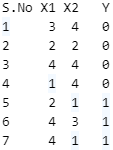


Report the following:
• Value of .coef_
,
• Value of .intercept_

In [8]:
import numpy as np
from sklearn.svm import LinearSVC

X = np.array([[3,4], [2,2], [4,4], [1,4], [2,1], [4,3], [4,1]])
Y = [0,0,0,0,1,1,1]
lsvc = LinearSVC()
lsvc. fit(X, Y)
print("Value of coef_ is:" , lsvc.coef_)
print("Value of intercept_ is:", lsvc. intercept_)

Value of coef_ is: [[ 0.88439959 -1.02510968]]
Value of intercept_ is: [-0.08040337]
